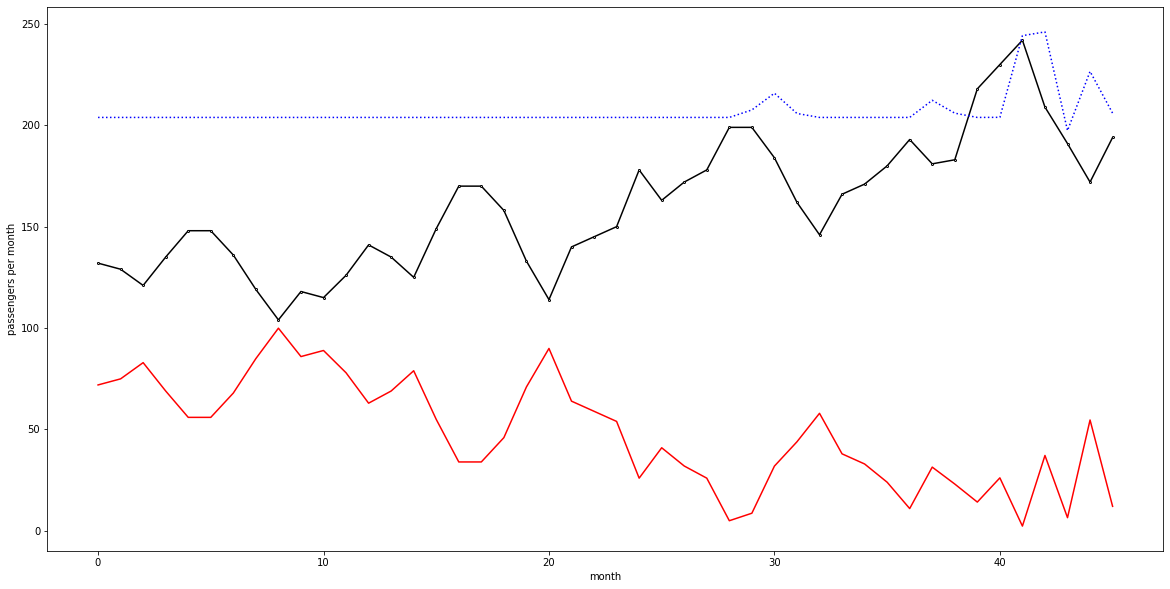

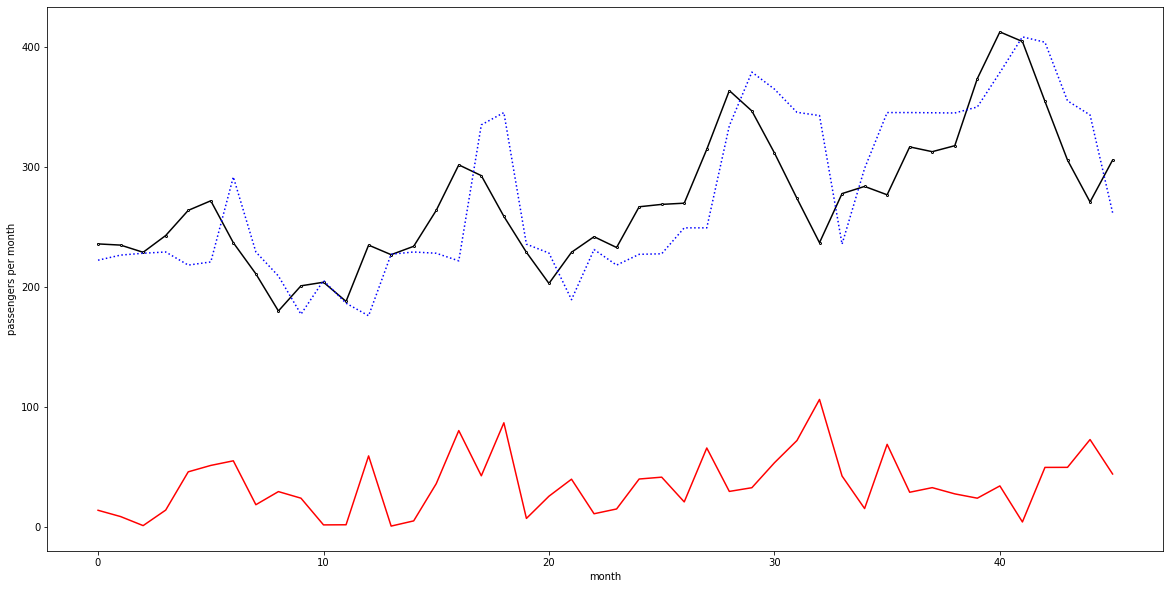

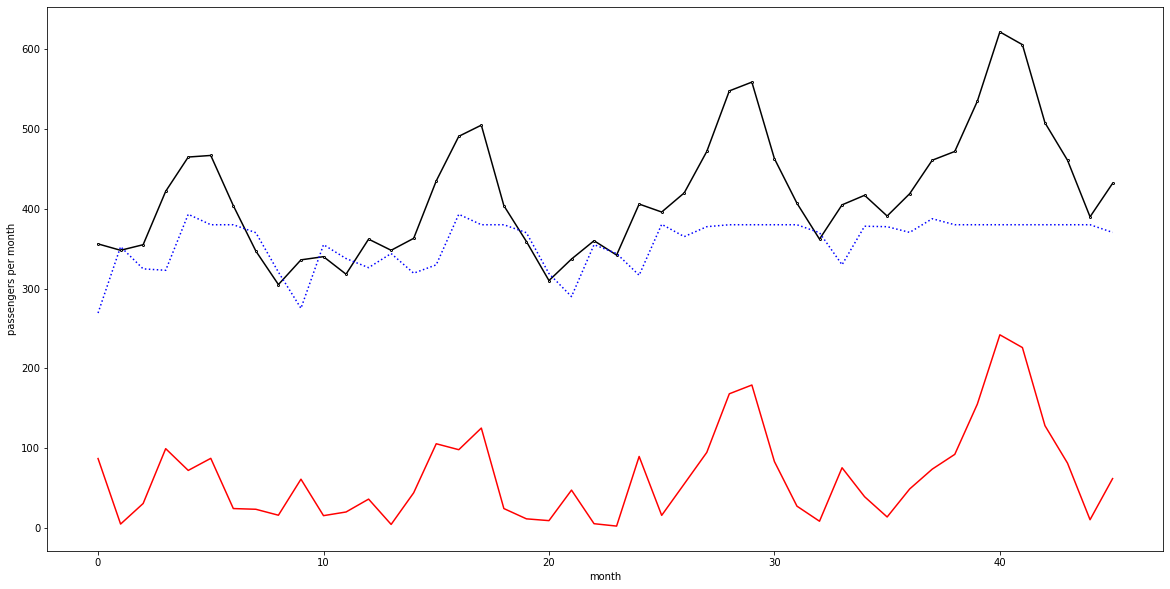

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels
import io
import requests
import os 
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import KFold


def make_data(x):
    window=3
    for i in range(1, window):
        column=f'lag{i}'
        x[column]=x[0].shift(i)
    
    return x

if __name__ == '__main__':
    df = pd.read_csv( os.path.join('dataset', 'passengers.csv'), header=None  )
    x = df
    kf = KFold( n_splits=3, shuffle=False )
    pr=[]
    re=[]
    f1 = []
    ac = []
    y_Leq=[]
    pred_Leq=[]
    no_Leq=[]
    n = []

    for train_index, test_index in kf.split( x ):
        x_train, x_test = x.iloc[train_index].values, x.iloc[test_index].values

        x_train=pd.DataFrame(x_train)

        x_train=make_data(x_train)
        x_train = x_train.dropna().reset_index(drop=True)

        X_train = x_train[x_train.columns[1:]].values
        Y_train =x_train[0].values

        x_test_df=pd.DataFrame(x_test)

        x_test_df=make_data(x_test_df)
        x_test_df = x_test_df.dropna().reset_index(drop=True)

        X_test = x_test_df[x_test_df.columns[1:]].values
        Y_test = x_test_df[0].values

        r_forest = RandomForestRegressor(
                    n_estimators=20,
                    criterion='mse',
                    random_state=1,
                    n_jobs=-1
        )

        r_forest.fit(X_train, Y_train)
        y_test_pred=r_forest.predict(X_test)

        # 生データをプロット
        ax =  x_test_df[0].plot(figsize=(20,10), grid=False, color=['k'], marker ='o', markersize=2, markerfacecolor='w')
        # 回帰データをプロット
        ax.plot(y_test_pred,linestyle='dotted',color='b')
        # 異常度をプロット
        ax.plot(np.abs(y_test_pred-Y_test),linestyle='solid',color='r',alpha=1)
        
        ax.set_xlabel('month')
        ax.set_ylabel('passengers per month')

        abnorm =np.abs(y_test_pred-Y_test)
        abnorm=np.array(abnorm)
        th_data=abnorm.copy()
        th_data.sort(axis=0)
        num=int(0.5*len(th_data))
        th=th_data[::-1][num]

        # 異常度の閾値のライン
#         plt.plot([0,150000], [th,th] , color='red', linestyle='-', linewidth=0.5)
        plt.show()